In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [11]:
file_path = "../data/all_data.csv"

In [12]:
data = pd.read_csv(file_path)

In [13]:
# visualization sub folder path to store plots
visualization_folder = "../visualizations"

In [14]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Check Data

In [15]:
data.shape

(96, 4)

In [16]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [17]:
# Check for missing values
print(data.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


Shape of the dataset: (96, 4)

Column names: Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13

Missing values:
 Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


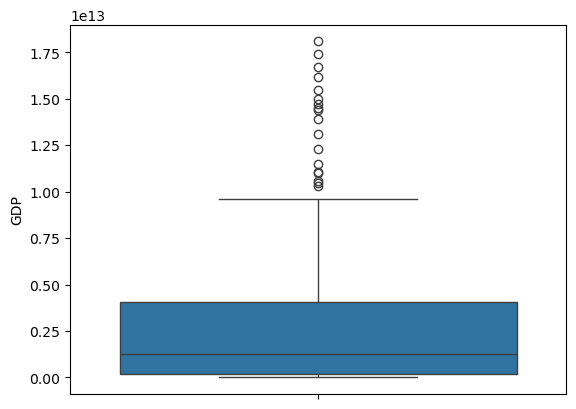

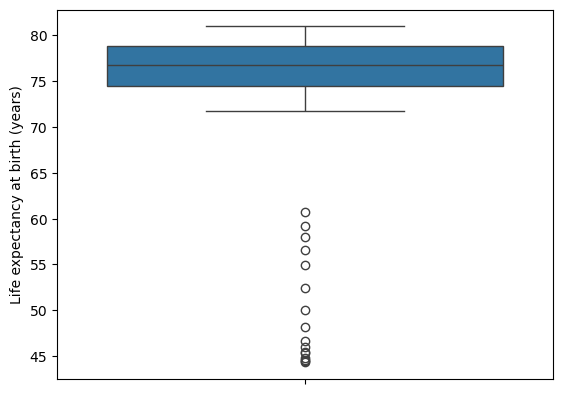

In [18]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", data.shape)
print()

# Get column names
print("Column names:", data.columns)
print()

# Get basic statistics
print(data.describe())
print()

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# check for outliers
sns.boxplot(data=data["GDP"])
box_plot_path = os.path.join(visualization_folder, "box_plot_GDP_outlier.png")
plt.savefig(box_plot_path, bbox_inches="tight")

plt.show()
plt.clf()
sns.boxplot(data=data["Life expectancy at birth (years)"])
box_plot_path = os.path.join(visualization_folder, "box_plot_Life_Expectancy_outlier.png")
plt.savefig(box_plot_path, bbox_inches="tight")
plt.show()
plt.clf()
plt.close()

## Calculate the IQR and Outlier Thresholds

In [19]:
def calculate_IQR(columns):
    for feature in columns:
        
        Q1 = data[feature].quantile(0.25)  # 25th percentile
        Q3 = data[feature].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                  # Interquartile range
        
        # Define outlier thresholds
        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR
        
        print(f"Lower Threshold for {feature}: {lower_threshold}")
        print(f"Upper Threshold for {feature}: {upper_threshold}")
        print()
        # Find outliers
        outliers = data[(data[feature] < lower_threshold) | (data[feature] > upper_threshold)]["Country"].unique()
        
        # Display the outliers
        print(f"Countries whose {feature} is beyond threshold is/are: {outliers}")
calculate_IQR(['Life expectancy at birth (years)', 'GDP'])

Lower Threshold for Life expectancy at birth (years): 67.83749999999998
Upper Threshold for Life expectancy at birth (years): 85.53750000000002

Countries whose Life expectancy at birth (years) is beyond threshold is/are: ['Zimbabwe']
Lower Threshold for GDP: -5668010625000.0
Upper Threshold for GDP: 9908822375000.0

Countries whose GDP is beyond threshold is/are: ['China' 'United States of America']


## Focus on the key variables in your dataset, such as GDP and Life Expectancy.

In [20]:
# Summary statistics for GDP and Life Expectancy
print("GDP Summary:\n", data['GDP'].describe())
print("Life Expectancy Summary:\n", data['Life expectancy at birth (years)'].describe())

# Check unique years and countries
print("Unique Years:", data['Year'].unique())
print("Unique Countries:", data['Country'].nunique())

GDP Summary:
 count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64
Life Expectancy Summary:
 count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64
Unique Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Unique Countries: 6


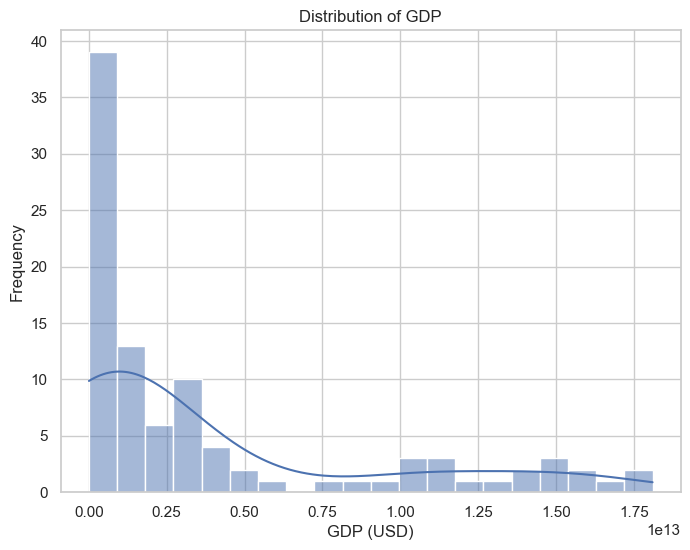

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Histogram of GDP
plt.figure(figsize=(8, 6))
sns.histplot(data['GDP'], bins=20, kde=True)
plt.title('Distribution of GDP')
plt.xlabel('GDP (USD)')
plt.ylabel('Frequency')
hist_plot_path = os.path.join(visualization_folder, "GDP_distribution.png")
plt.savefig(hist_plot_path, bbox_inches="tight")
plt.show()
plt.close()

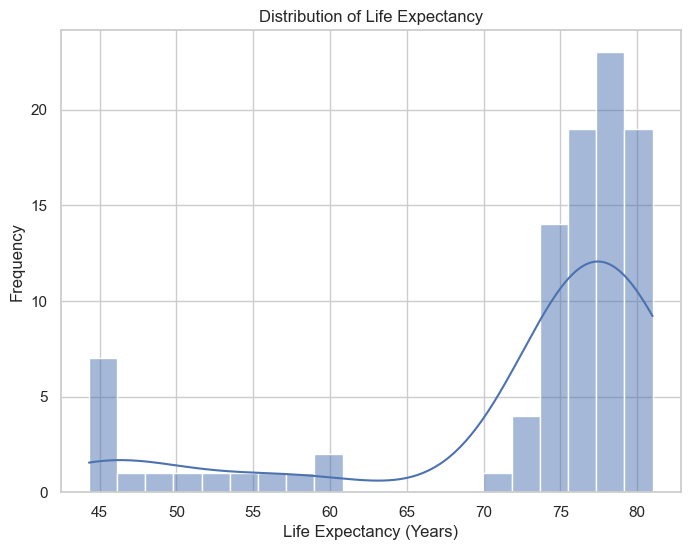

In [22]:
# Histogram of Life Expectancy
plt.figure(figsize=(8, 6))
sns.histplot(data['Life expectancy at birth (years)'], bins=20, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
hist_plot_path = os.path.join(visualization_folder, "LifeExpectancy_distribution.png")
plt.savefig(hist_plot_path, bbox_inches="tight")
plt.show()
plt.close()



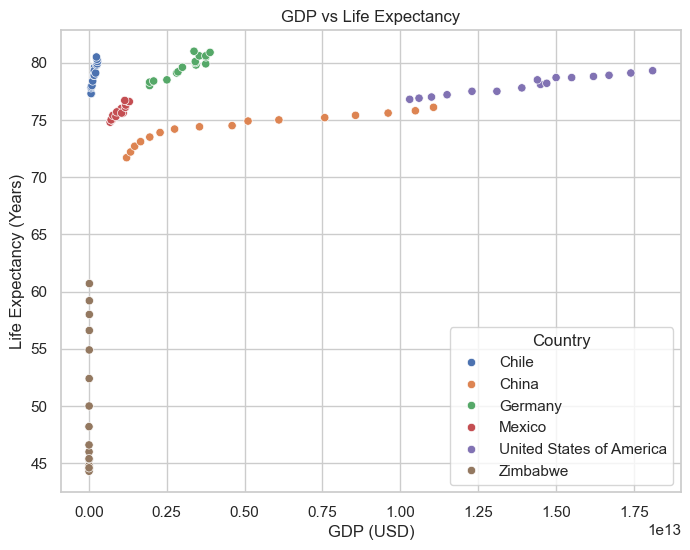

In [23]:
# Multivariate Analysis
# Scatter plot: GDP vs Life Expectancy For Each Country
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)',hue="Country", data=data)
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP (USD)')
plt.ylabel('Life Expectancy (Years)')
scatter_plot_path = os.path.join(visualization_folder, "GDP_vs_LE_by_Contry.png")
plt.savefig(scatter_plot_path, bbox_inches="tight")
plt.show()
plt.close()

In [24]:
countries = data.Country.unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

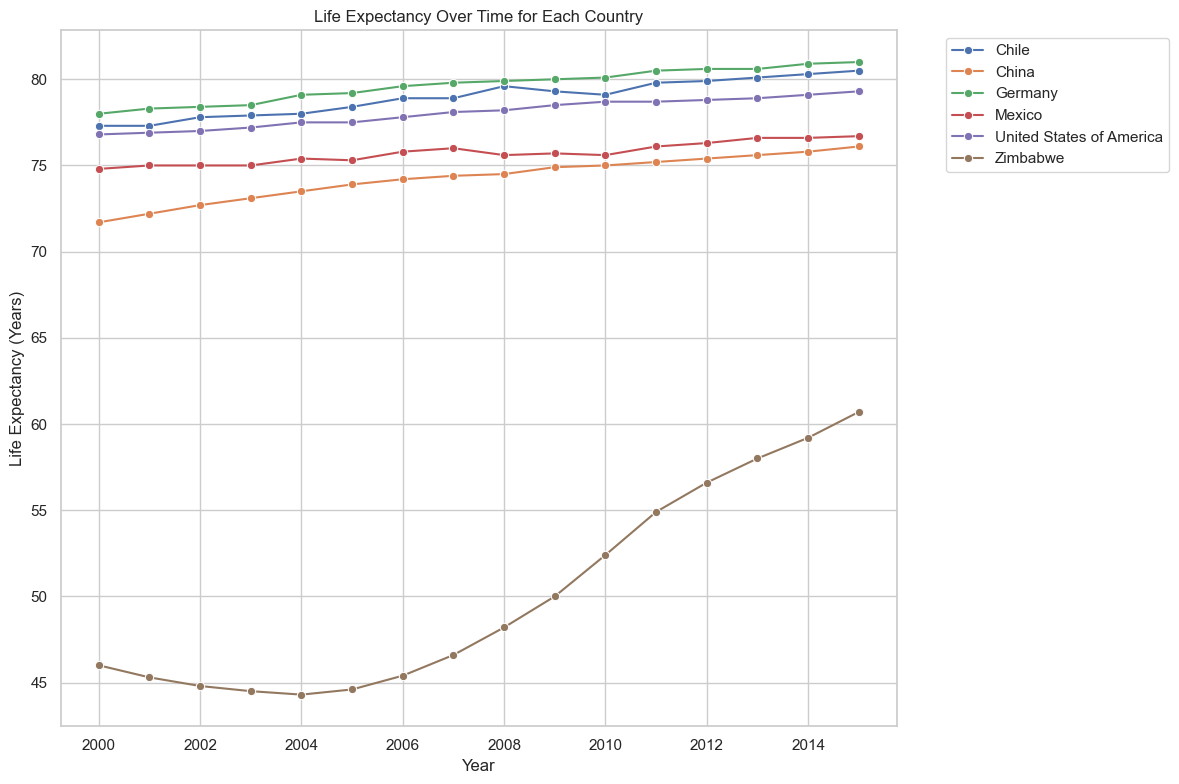

In [25]:
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = data[data["Country"] == country]
    sns.lineplot(x='Year', y="Life expectancy at birth (years)",data=country_data, label=country, marker="o")
# Add labels and title
plt.title('Life Expectancy Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to fit the legend
line_plot_path = os.path.join(visualization_folder, "LE_time_by_country.png")
plt.savefig(line_plot_path, bbox_inches="tight")
plt.show()
plt.close()

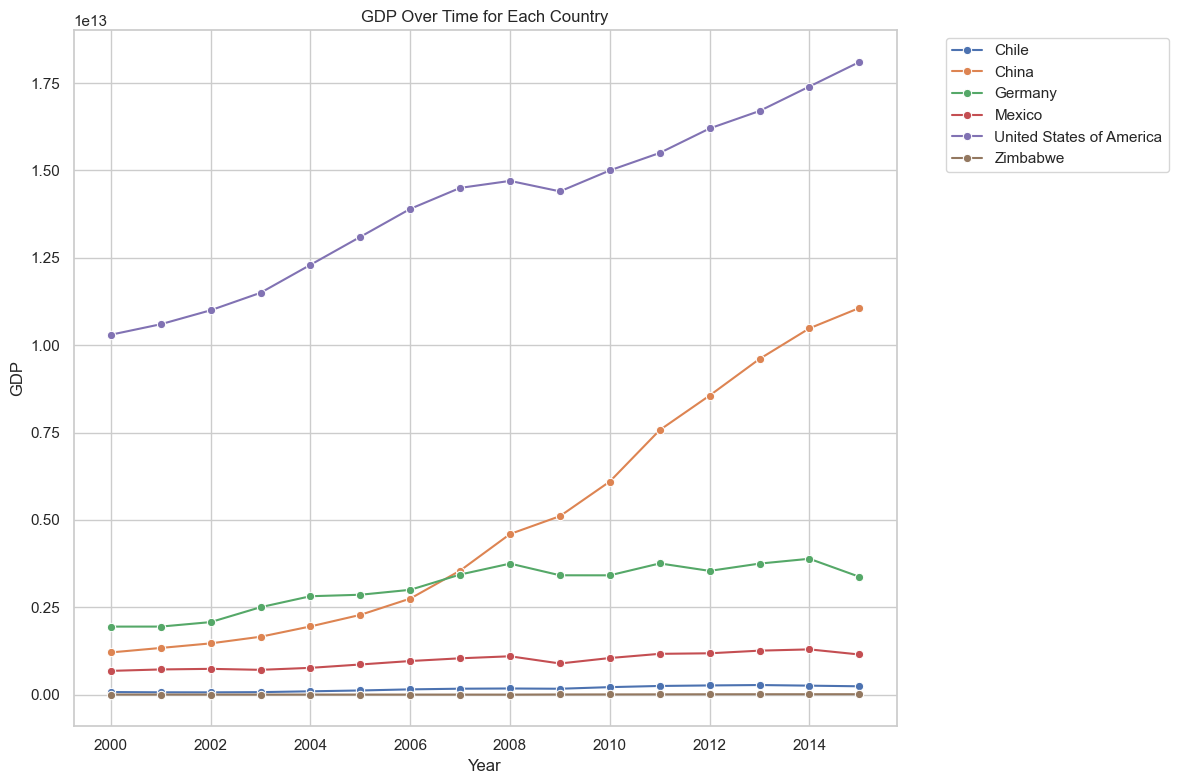

In [26]:
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = data[data["Country"] == country]
    sns.lineplot(x='Year', y="GDP",data=country_data, label=country, marker="o")
# Add labels and title
plt.title('GDP Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to fit the legend
line_plot_path = os.path.join(visualization_folder, "GDP_time_by_country.png")
plt.savefig(line_plot_path, bbox_inches="tight")
plt.show()
plt.close()

In [27]:
average_life_expectancy = data.groupby("Country")["Life expectancy at birth (years)"].mean().reset_index()
print(average_life_expectancy)

                    Country  Life expectancy at birth (years)
0                     Chile                          78.94375
1                     China                          74.26250
2                   Germany                          79.65625
3                    Mexico                          75.71875
4  United States of America                          78.06250
5                  Zimbabwe                          50.09375


In [28]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [29]:
# Correlation matrix
numeric_data = data.select_dtypes(include=["number"])
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                       Year  Life expectancy at birth (years)  \
Year                              1.000000                          0.155050   
Life expectancy at birth (years)  0.155050                          1.000000   
GDP                               0.208288                          0.343207   

                                       GDP  
Year                              0.208288  
Life expectancy at birth (years)  0.343207  
GDP                               1.000000  


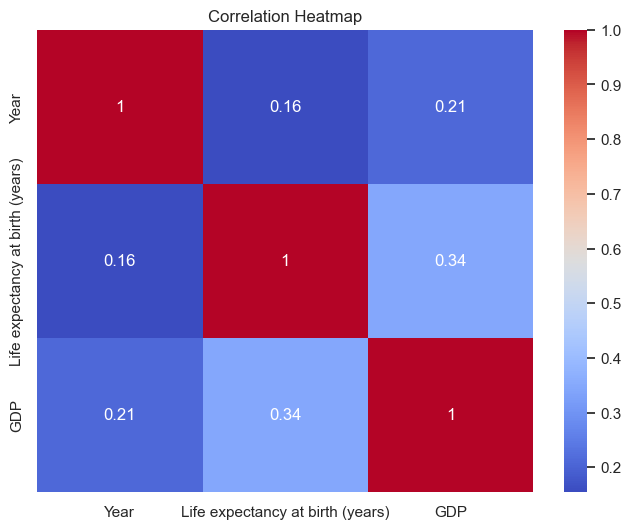

In [30]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
corr_plot_path = os.path.join(visualization_folder, "corr_matrix.png")
plt.savefig(corr_plot_path, bbox_inches="tight")
plt.show()
plt.close()

### Violin Plot: Life Expectancy Distribution by Country
This plot shows the distribution of life expectancy across different countries. The width of the violin represents the density of the data, while the box plot inside shows the median and interquartile range.

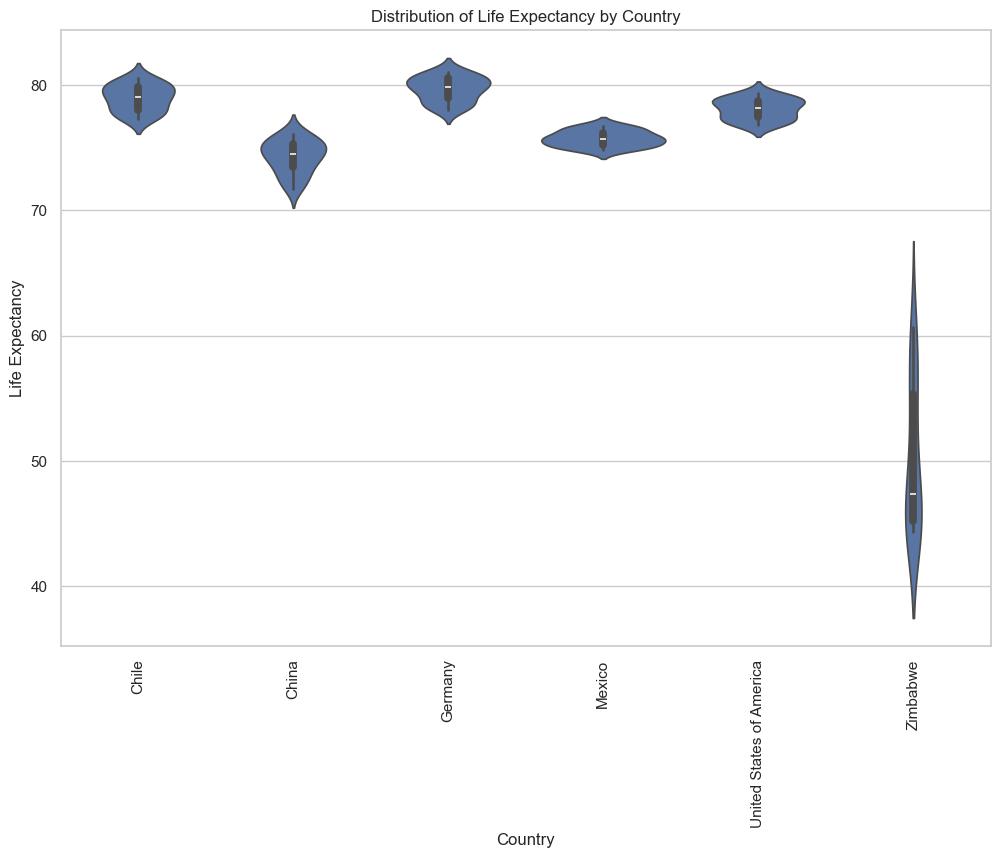

In [31]:
plt.figure(figsize=(12,8))

# Create a Violin plot
sns.violinplot(x="Country", y="Life expectancy at birth (years)", data=data)

# Add labels and title
plt.title("Distribution of Life Expectancy by Country")
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=90)
violin_plot_path = os.path.join(visualization_folder, "LE_distribution_by_country.png")
plt.savefig(violin_plot_path, bbox_inches="tight")

plt.show()
plt.close()

##  Facet Grid of Scatter Graphs: GDP vs. Life Expectancy by Country
    `A facet grid allows you to create multiple scatter plots, each representing the relationship between GDP and life expectancy for a specific country.`

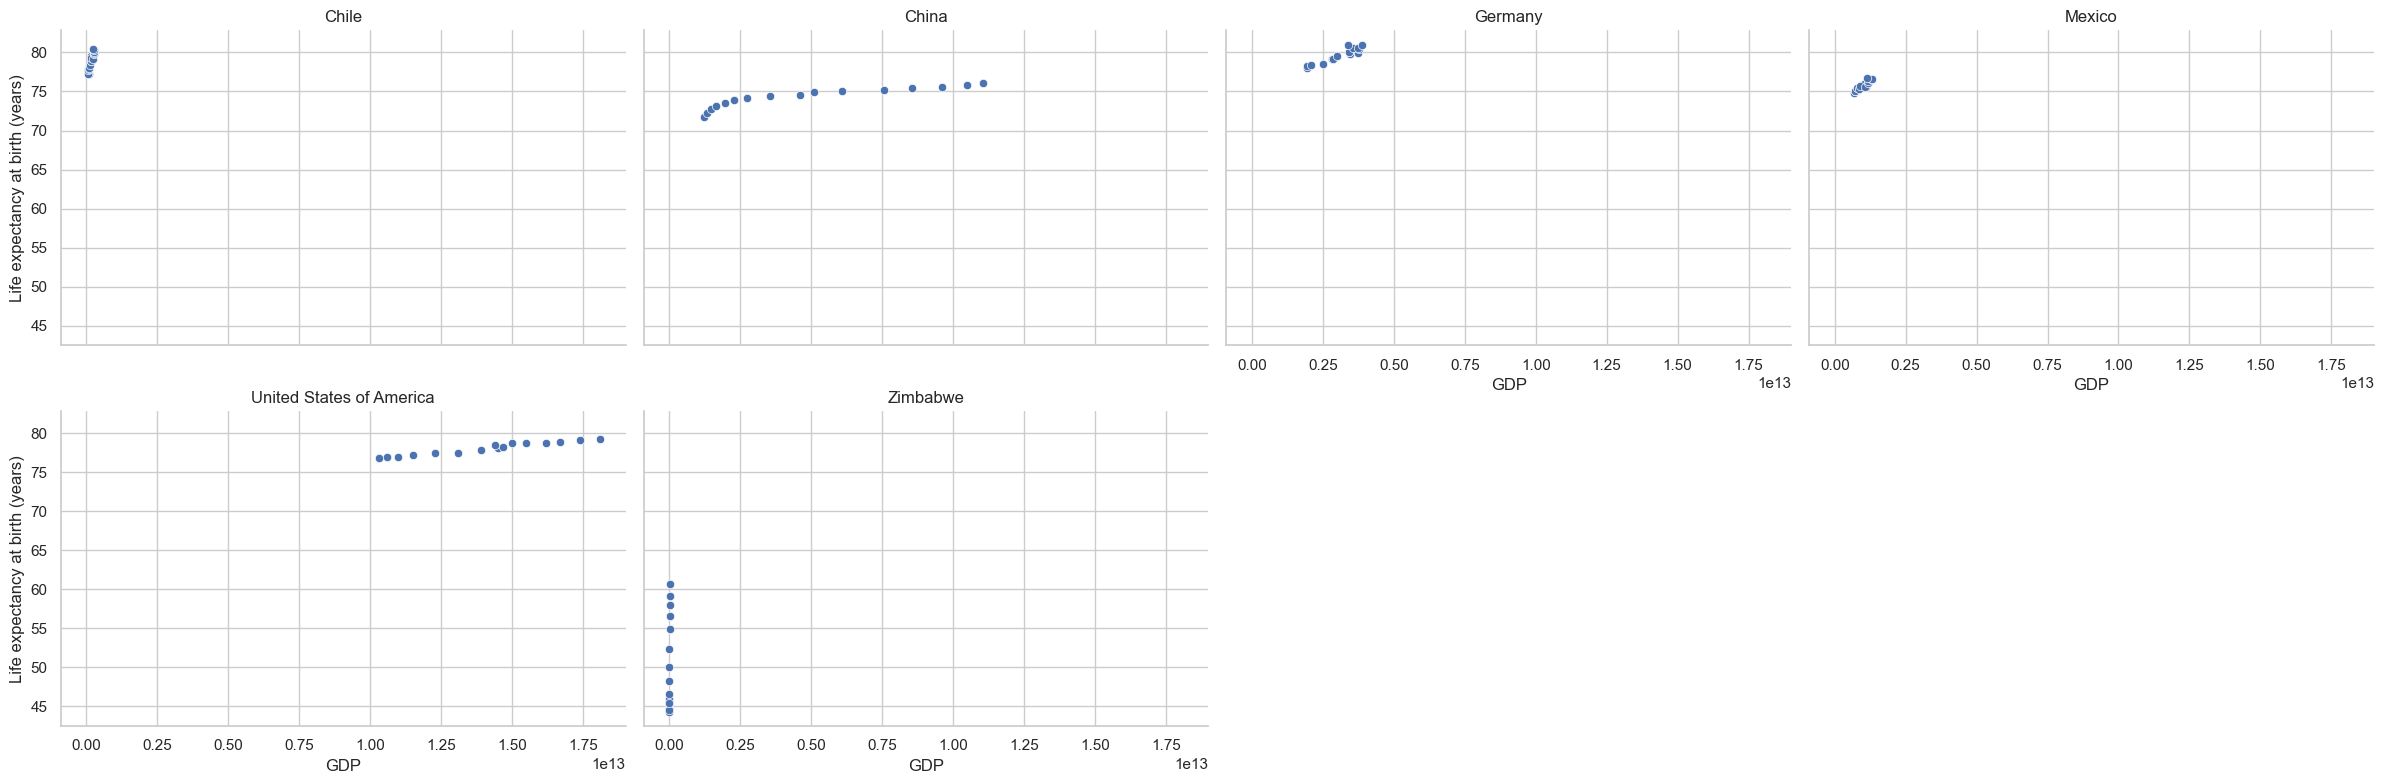

In [32]:
# create a facet grid of scatter plots
g = sns.FacetGrid(data, col="Country", col_wrap=4, height=4, aspect=1.5)
g.map(sns.scatterplot, "GDP", "Life expectancy at birth (years)")

# Add labels and Titles
g.set_axis_labels("GDP", "Life expectancy at birth (years)")
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()

scatter_plot_path = os.path.join(visualization_folder, "GDP_vs_LE_facetGrid.png")
plt.savefig(scatter_plot_path, bbox_inches="tight")
plt.show()
plt.close()

## Facet Grid of Line Graphs: GDP Over Time by Country
    `This visualization shows how GDP has changed over time for each country.`

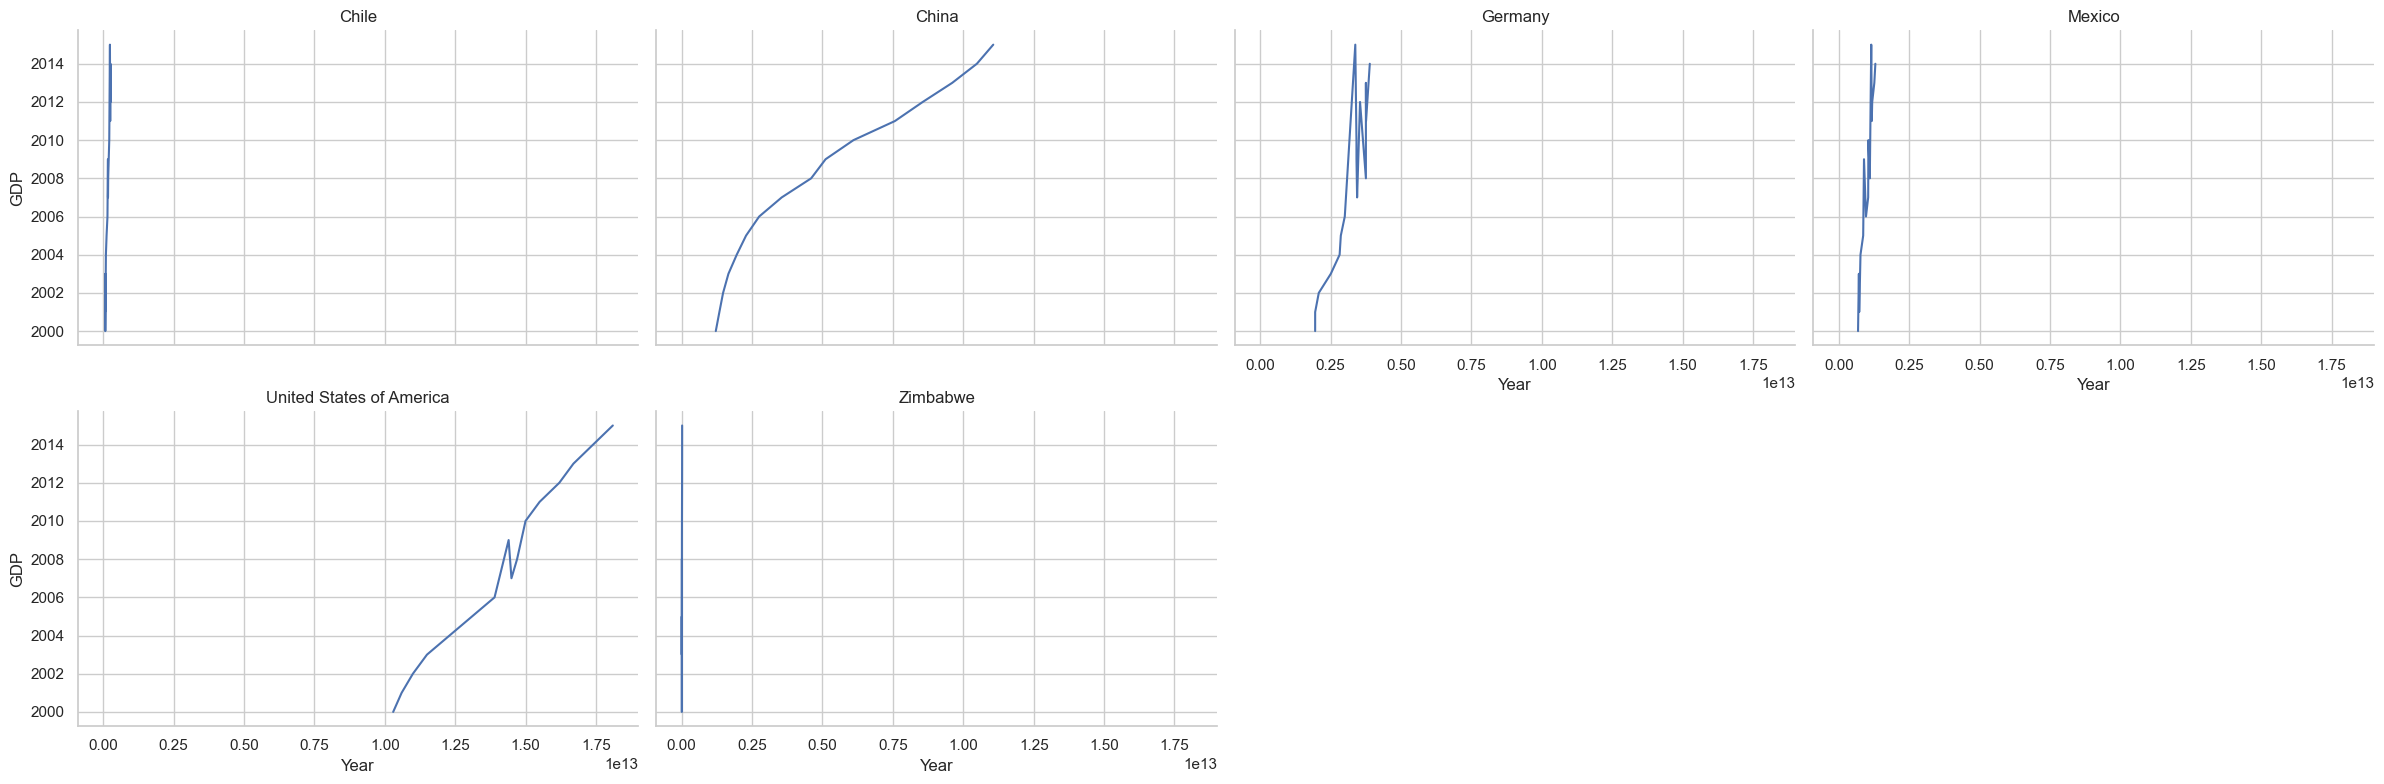

In [33]:
# create a facet grid of line plots for GDP over time
g = sns.FacetGrid(data, col="Country", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, "GDP", "Year")

# Add labels and Titles
g.set_axis_labels("Year", "GDP")
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()
line_plot_path = os.path.join(visualization_folder, "GDP_FacetGrid.png")
plt.savefig(line_plot_path, bbox_inches="tight")
plt.show()
plt.close()

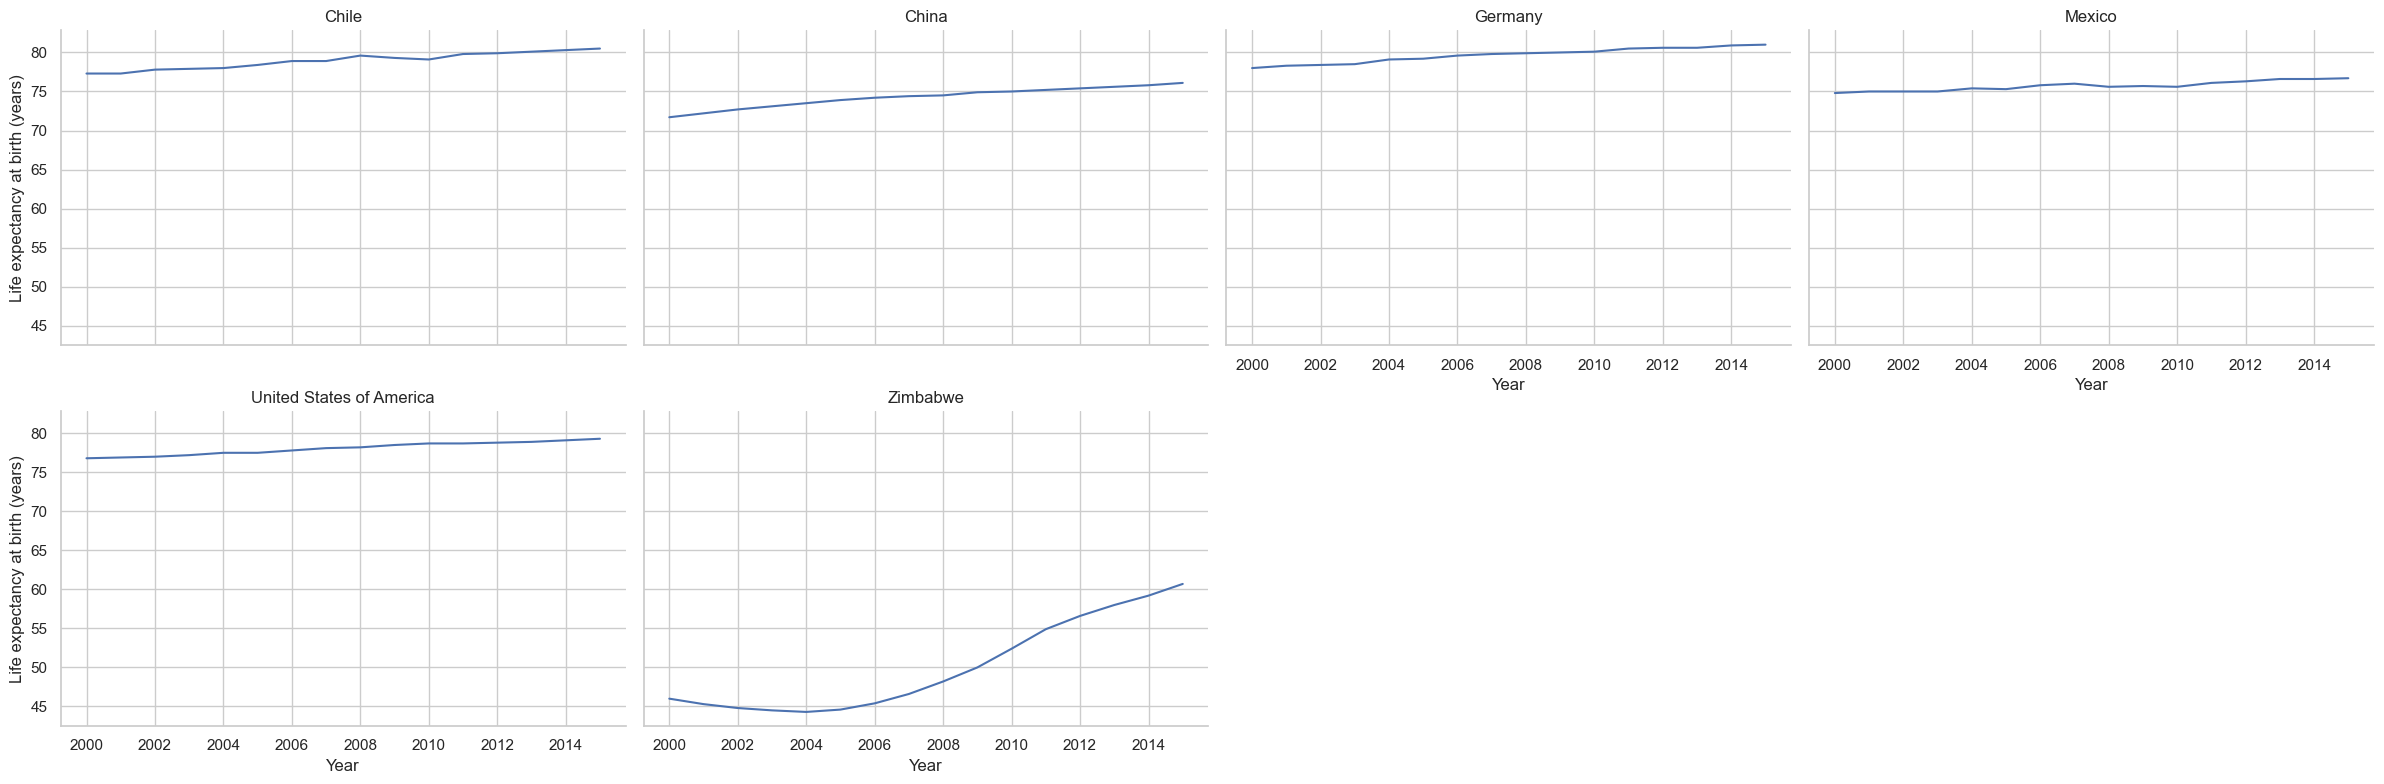

In [34]:
# create a facet grid of line plots for Life Expectancy over time
g = sns.FacetGrid(data, col="Country", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, "Year", "Life expectancy at birth (years)")

# Add labels and Titles
g.set_axis_labels("Year", "Life expectancy at birth (years)")
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()
line_plot_path = os.path.join(visualization_folder, "LE_FacetGrid.png")
plt.savefig(line_plot_path, bbox_inches="tight")
plt.show()


plt.close()

Step 1: Define Your Hypothesis
Start by formulating a null hypothesis (H₀) and an alternative hypothesis (H₁). For example:

Null Hypothesis (H₀): There is no relationship between GDP and life expectancy.

Alternative Hypothesis (H₁): There is a relationship between GDP and life expectancy.

Step 2: Choose the Appropriate Test
The type of hypothesis test you use depends on the nature of your data and the question you’re trying to answer. Here are some common tests and when to use them:

Pearson Correlation Test:

Use this to test the relationship between two continuous variables (e.g., GDP and life expectancy).

Assumptions:

Both variables are normally distributed.

The relationship is linear.

T-Test:

Use this to compare the means of two groups (e.g., life expectancy in high-GDP vs. low-GDP countries).

Types:

Independent T-Test: For comparing two independent groups.

Paired T-Test: For comparing the same group at two different times.

ANOVA (Analysis of Variance):

Use this to compare the means of more than two groups (e.g., life expectancy across multiple income groups).

Chi-Square Test:

Use this to test the association between two categorical variables (e.g., country and a binary outcome like high/low life expectancy).

## 1. Pearsons Correlation Test

Test the relationship between GDP and Life Expectancy

In [50]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(data["GDP"], data["Life expectancy at birth (years)"])

print(f"Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret Results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between GDP and life expectancy.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between GDP and life expectancy.")

Correlation Coefficient: 0.343206748449156
P-value: 0.0006187129569469888
Reject the null hypothesis: There is a significant relationship between GDP and life expectancy.


## 1.1  Pearsons Correlation Test Coutry-wise

In [62]:
# Dictionary to store results
country_correlations = {}
#Group data by country
grouped_data = data.groupby("Country")
for country, group in grouped_data:
    corr,p_value = pearsonr(group["GDP"], group["Life expectancy at birth (years)"])
    country_correlations[country] = {"Correlation": corr, "P-value": p_value}


print(country_correlations)
# Convert results to a DataFrame

correlation_df = pd.DataFrame(country_correlations).T.reset_index()
correlation_df.columns = ['Country', 'Correlation', 'P-value']
correlation_df

{'Chile': {'Correlation': 0.9498766659254416, 'P-value': 1.8659139746585315e-08}, 'China': {'Correlation': 0.9085255408648358, 'P-value': 1.125098572070064e-06}, 'Germany': {'Correlation': 0.9326988982561268, 'P-value': 1.4018815534045922e-07}, 'Mexico': {'Correlation': 0.9322377167847081, 'P-value': 1.4686960248304982e-07}, 'United States of America': {'Correlation': 0.9817092382430257, 'P-value': 1.749970926909946e-11}, 'Zimbabwe': {'Correlation': 0.9661998955858777, 'P-value': 1.2358516366846197e-09}}


,Country,Correlation,P-value
0,Chile,0.949877,1.865914e-08
1,China,0.908526,1.125099e-06
2,Germany,0.932699,1.401882e-07
3,Mexico,0.932238,1.468696e-07
4,United States of America,0.981709,1.749971e-11
5,Zimbabwe,0.966200,1.235852e-09


## 2. Independent T-Test
Compare life expectancy between high-GDP and low-GDP countries:

In [40]:
from scipy.stats import ttest_ind

# create two groups based on GDP
median_gdp = data["GDP"].median()
high_gdp = data[data["GDP"] > median_gdp]["Life expectancy at birth (years)"]
low_gdp = data[data["GDP"] <= median_gdp]["Life expectancy at birth (years)"]

# Perform the T-test
t_stat, p_value = ttest_ind(high_gdp, low_gdp)
# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in life expectancy between high-GDP and low-GDP countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in life expectancy between high-GDP and low-GDP countries.")

T-statistic: 4.71031522835633
P-value: 8.529105799033812e-06
Reject the null hypothesis: There is a significant difference in life expectancy between high-GDP and low-GDP countries.


## 3. ANOVA
Compare life expectancy across multiple income groups:

In [46]:
from scipy.stats import f_oneway

# Create groups (e.g., Low, Medium, High GDP)

low_gdp = data[data["GDP"] < data["GDP"].quantile(0.33)]["Life expectancy at birth (years)"]
medium_gdp = data[(data["GDP"] >= data["GDP"].quantile(0.33))
            & (data["GDP"] <= data["GDP"].quantile(0.66))]["Life expectancy at birth (years)"]
high_gdp = data[data["GDP"] > data["GDP"].quantile(0.66)]["Life expectancy at birth (years)"]

# Perform ANOVA
f_stat, p_value = f_oneway(low_gdp, medium_gdp, high_gdp)

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in life expectancy across income groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in life expectancy across income groups.")

F-statistic: 20.750105952305383
P-value: 3.538661893450031e-08
Reject the null hypothesis: There is a significant difference in life expectancy across income groups.


## 4. Chi-Square Test
Test the association between country and a binary outcome (e.g., high/low life expectancy):

In [49]:
from scipy.stats import chi2_contingency

# Create a contingency table (e.g., country vs. high/low life expectancy)

data["Life expectancy Category"] = data["Life expectancy at birth (years)"]\
                                    .apply(lambda x: "High" if x > data["Life expectancy at birth (years)"]\
                                           .median() else "Low")

contingency_table = pd.crosstab(data["Country"], data["Life expectancy Category"])

# Perform Chi-Square Test

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between country and life expectancy category.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between country and life expectancy category.")


Chi-Square Statistic: 96.0
P-value: 3.677817438496902e-19
Reject the null hypothesis: There is a significant association between country and life expectancy category.
